In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import yfinance as yf
import datetime as dt
from datetime import date, timedelta

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Define the dates to Fetch the data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1

d2 = (today - timedelta(days=365)).strftime("%Y-%m-%d")
start_date = d2

print("Your data will be in these dates : ",start_date, end_date)

Your data will be in these dates :  2022-08-29 2023-08-29


In [3]:
# Define the ticker
ticker = 'GOOGL' # This is stock symbol of GOOGLE

# Download Dataset from this ticker
df_data  = yf.download(ticker, start=start_date, end=end_date, progress=False)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-08-29 to 2023-08-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [4]:
# Creating a new columns
df_data['date'] = df_data.index
df_data.reset_index(drop=True, inplace=True)

In [5]:
# Reset the column sequence
df_data.insert(0, 'Date', df_data.index, True)
# df = df[['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [6]:
df_data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,date
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251
mean,125.000000,105.938765,107.418327,104.734183,106.076693,106.076693,3.370008e+07,2023-02-26 10:42:32.988047872
min,0.000000,85.400002,86.519997,83.339996,83.430000,83.430000,9.701400e+06,2022-08-29 00:00:00
25%,62.500000,95.399998,96.930000,94.130001,95.555000,95.555000,2.611375e+07,2022-11-26 12:00:00
50%,125.000000,102.389999,103.889999,101.220001,102.900002,102.900002,3.025810e+07,2023-02-28 00:00:00
75%,187.500000,119.424999,120.869999,118.405003,119.605000,119.605000,3.658815e+07,2023-05-28 00:00:00
max,250.000000,133.949997,134.250000,131.779999,132.720001,132.720001,1.194550e+08,2023-08-28 00:00:00
std,72.601653,13.402754,13.471737,13.386301,13.409503,13.409503,1.322138e+07,NaN


In [7]:
# Plot the Data to see how it looks like
fig = px.line(df_data, x='date', y=df_data.columns, title='Google Stock Price')
fig.show()

In [8]:
df_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'date'], dtype='object')

In [9]:
# Selecting the columns
df = df_data[['date', 'Close']]
df.head()

,date,Close
0,2022-08-29,109.419998
1,2022-08-30,108.940002
2,2022-08-31,108.220001
3,2022-09-01,109.739998
4,2022-09-02,107.849998


In [10]:
# Plot the Data to see how it looks like
fig = px.line(df, x='date', y='Close', title='Google Stock Price')
fig.show()

In [11]:
# Stationarity Check on data 
from statsmodels.tsa.stattools import adfuller 

def check_stationarity (df):  # (df_check)
    result = adfuller(df)
    print('ADF Statistic : %f' % result[0])
    print('p-value : %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the Null  Hypothesis. Data is Stationary.")
    else:
        print("Fail to Reject the Null  Hypothesis. Data is not Stationary.")

check_stationarity(df['Close'])

ADF Statistic : -0.529577
p-value : 0.886114
Fail to Reject the Null  Hypothesis. Data is not Stationary.


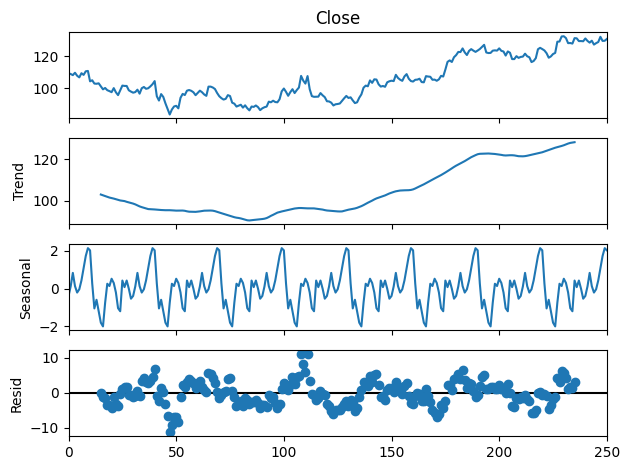

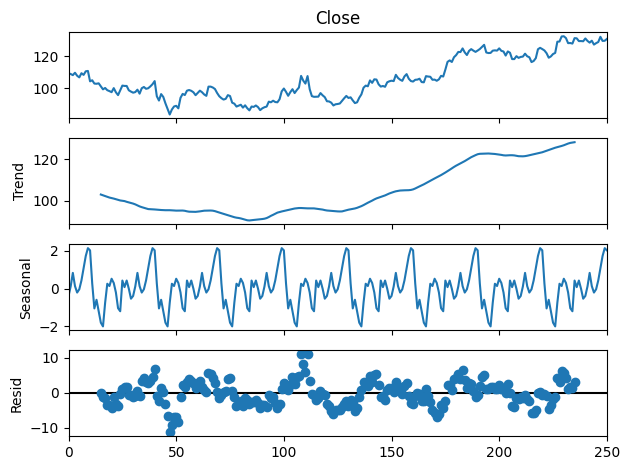

In [12]:
# Let's Decompose the data to see the trend, seasonality and noise
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='additive', period=30)
decomposition.plot()

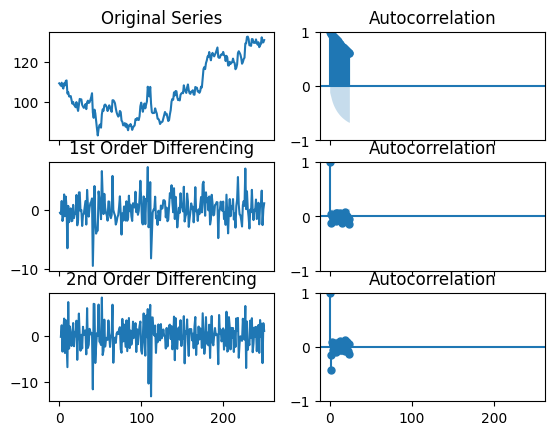

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1,0].set_title( '1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2,0].set_title( '2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

`d = 1`

           0
0   1.000000
1   0.978831
2   0.957203
3   0.938943
4   0.918945
5   0.902020
6   0.885127
7   0.869490
8   0.854780
9   0.838897
10  0.820609
11  0.800535
12  0.782082
13  0.764383
14  0.744637
15  0.725188
16  0.708979
17  0.696628
18  0.684056
19  0.669082
20  0.653763
21  0.639486
22  0.624533
23  0.613756


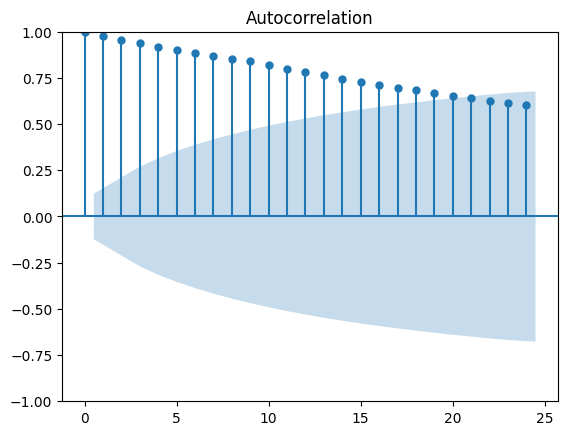

In [14]:
# Let's find P Value
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

`P = 2`

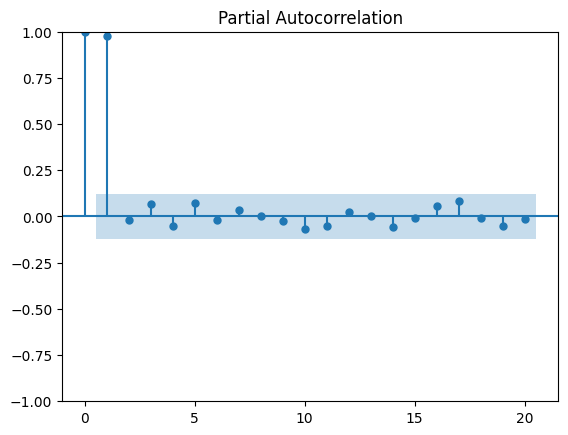

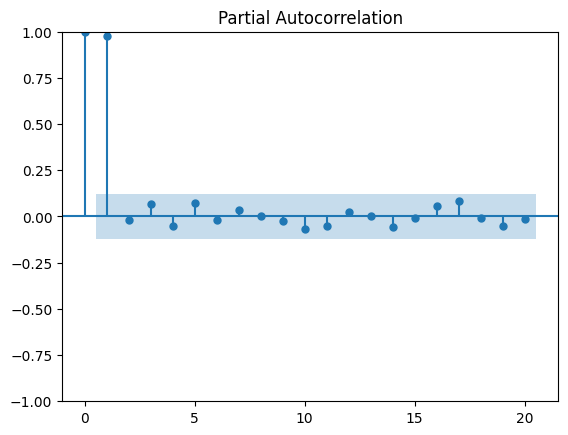

In [15]:
# Let's find the Q value
# partial autocorrelation
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

`Q = 2`

In [16]:
# lets define p d q
p = 2
d = 1
q = 2

In [17]:
# lets run ARIMA with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.56 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1236.963, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1190.321, Time=0.22 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1238.781, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1155.827, Time=0.68 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.02 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.74 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1153.831, Time=1.00 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1188.696, Time=0.18 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.70 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1155.826, Time=0.56 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1156.290, Time=1.03 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1155.6

In [18]:
model = auto_arima(df['Close'], seasonal=True, suppress_warnings=True)
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -557.936
Date:                Tue, 29 Aug 2023   AIC                           1117.871
Time:                        19:57:02   BIC                           1121.393
Sample:                             0   HQIC                          1119.288
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.0815      0.318     15.958      0.000       4.457       5.706
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                45.98
Prob(Q):                              0.54   Pr

In [ ]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA

p ,d , q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
modal = model.fit
# print(modal.summary())

# predict next 30 days
forecast = model.predict(len(df['Close']), len(df['Close'])+30)
print(forecast)
# plot forecast
plt.fig(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='forecast')